In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math,copy
np.set_printoptions(precision=2)

In [2]:
house_data = pd.read_csv("prob2data.csv")
display(house_data)

,id,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,7129300520,221900.0,3,1.00,1180,1.0,1955
1,6414100192,538000.0,3,2.25,2570,2.0,1951
2,5631500400,180000.0,2,1.00,770,1.0,1933
3,2487200875,604000.0,4,3.00,1960,1.0,1965
4,1954400510,510000.0,3,2.00,1680,1.0,1987
...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,3.0,2009
21609,6600060120,400000.0,4,2.50,2310,2.0,2014
21610,1523300141,402101.0,2,0.75,1020,2.0,2009
21611,291310100,400000.0,3,2.50,1600,2.0,2004


In [3]:
house_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'yr_built'],
      dtype='object')

In [4]:
house_data = house_data.drop(["id"],axis=1)

<AxesSubplot:>

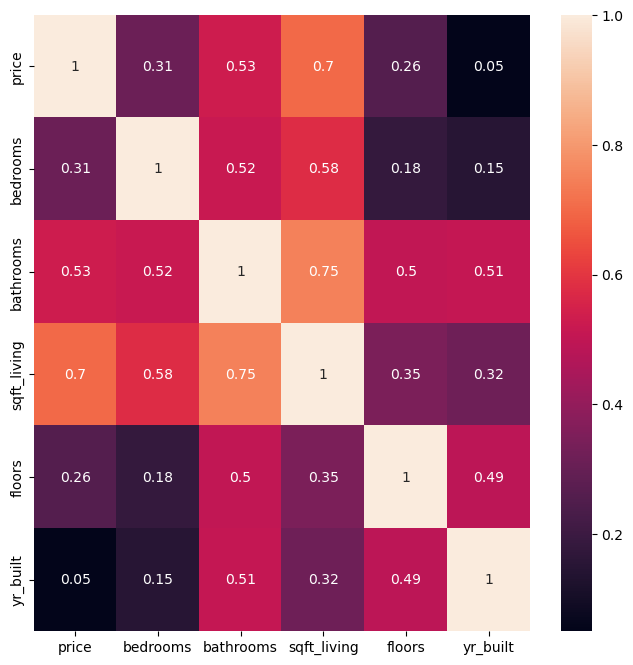

In [5]:
correlation_matrix = house_data.corr().round(2)
plt.figure(figsize=[8,8])
sns.heatmap(data=correlation_matrix,annot=True)
#From the correlation matrix we can identify strongest correlators to price are bathrooms,sqft_living,
#while the bedrooms and floors are weakly correlated
#yr_built is uncorrelated

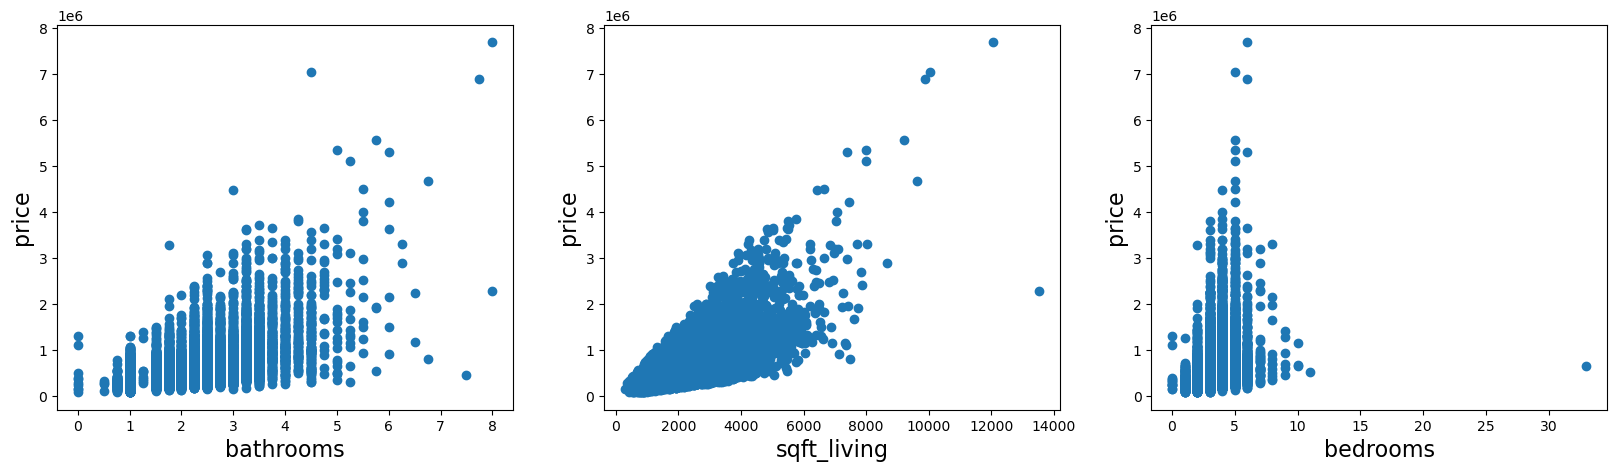

In [6]:
# we can observe the impact of each features on price by simple scatter plot
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.scatter(house_data['bathrooms'],house_data['price'])
plt.xlabel('bathrooms',fontsize=16)
plt.ylabel('price',fontsize=16)


plt.subplot(1,3,2)
plt.scatter(house_data['sqft_living'],house_data['price'])
plt.xlabel('sqft_living',fontsize=16)
plt.ylabel('price',fontsize=16)

plt.subplot(1,3,3)
plt.scatter(house_data['bedrooms'],house_data['price'])
plt.xlabel('bedrooms',fontsize=16)
plt.ylabel('price',fontsize=16)

plt.show()



Text(0, 0.5, 'price')

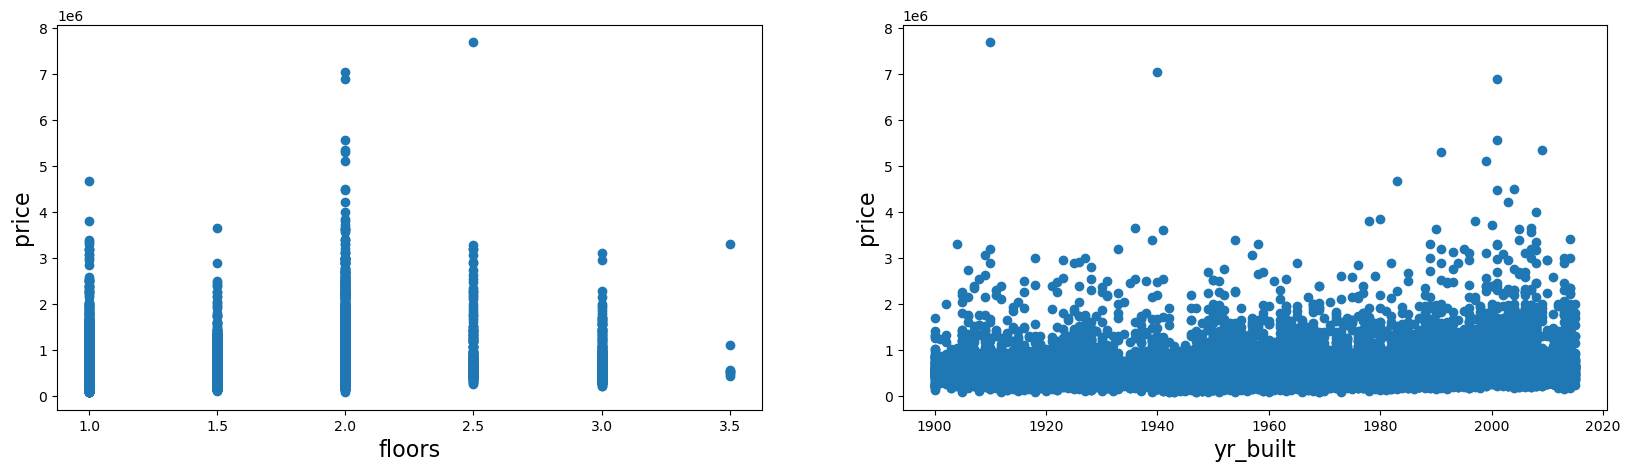

In [7]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.scatter(house_data['floors'],house_data['price'])
plt.xlabel('floors',fontsize=16)
plt.ylabel("price",fontsize=16)

plt.subplot(1,2,2)
plt.scatter(house_data['yr_built'],house_data['price'])
plt.xlabel('yr_built',fontsize=16)
plt.ylabel("price",fontsize=16)



# Normalizing the features

In [8]:
house_data_features = ["bathrooms","sqft_living","bedrooms","floors","yr_built"]
mean = []
house_data_norm = house_data
#mean_1 = np.mean(house_data_norm["bathrooms"])
mean_1 = np.mean(house_data_norm["bathrooms"])
mean.append(mean_1)
house_data_norm["bathrooms"]=(house_data_norm["bathrooms"]-mean_1)/(max(house_data_norm["bathrooms"])-min(house_data_norm["bathrooms"]))   

mean_2 = np.mean(house_data_norm["sqft_living"])
mean.append(mean_2)
house_data_norm["sqft_living"]=(house_data_norm["sqft_living"]-mean_2)/(max(house_data_norm["sqft_living"])-min(house_data_norm["sqft_living"]))   

mean_3 = np.mean(house_data_norm["bedrooms"])
mean.append(mean_3)
house_data_norm["bedrooms"]=(house_data_norm["bedrooms"]-mean_3)/(max(house_data_norm["bedrooms"])-min(house_data_norm["bedrooms"]))   

mean_4 = np.mean(house_data_norm["floors"])
mean.append(mean_4)
house_data_norm["floors"]=(house_data_norm["floors"]-mean_4)/(max(house_data_norm["floors"])-min(house_data_norm["floors"]))   

mean_5 = np.mean(house_data_norm["yr_built"])
mean.append(mean_5)
house_data_norm["yr_built"]=(house_data_norm["yr_built"]-mean_4)/(max(house_data_norm["yr_built"])-min(house_data_norm["yr_built"]))   

house_data_norm

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,221900.0,-0.011238,-0.139345,-0.067917,-0.197724,16.987006
1,538000.0,-0.011238,0.016905,0.036989,0.202276,16.952223
2,180000.0,-0.041541,-0.139345,-0.098860,-0.197724,16.795702
3,604000.0,0.019065,0.110655,-0.009049,-0.197724,17.073963
4,510000.0,-0.011238,-0.014345,-0.030181,-0.197724,17.265267
...,...,...,...,...,...,...
21608,360000.0,-0.011238,0.048155,-0.041502,0.602276,17.456571
21609,400000.0,0.019065,0.048155,0.017366,0.202276,17.500049
21610,402101.0,-0.041541,-0.170595,-0.079992,0.202276,17.456571
21611,400000.0,-0.011238,0.048155,-0.036219,0.202276,17.413093


In [9]:

y_train = house_data_norm["price"]
x_train = house_data_norm.drop(["price"],axis=1)
#x_train.iloc[0,:]
#y_train.iloc[0]
#t = np.array(x_train.iloc[0,:])
#p = y_train.iloc[0]
#err = np.dot(np.array(x_train.iloc[0,:]),w) -y.iloc[0]
#print(err)

#x_train_np = np.array(x_train)
#y_train_np = np.array(y_train)
#print(x_train_np.shape)

In [10]:
def multi_compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_w_b_i = np.dot(np.array(x.iloc[i,:]),w)+b
        cost+= (f_w_b_i - y.iloc[i])**2
    total_cost = cost/(2*m)
    return total_cost

In [11]:
def multi_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        
        err = np.dot(np.array(x.iloc[i,:]),w) -y.iloc[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * x.iloc[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [20]:
def multi_gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):

# An array to store cost J and w's at each iteration primarily for graphing late
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history #return final w,b and J history for graphing



In [ ]:
#initialize the parameter
np.random.seed(1)
#w_initial =np.random.rand(5)
w_initial =np.random.uniform(-10,10,5)
print(w_initial)
b_initial = np.random.uniform(-10,10)
print(b_initial)
alpha = 1.0e-5
iterations = 1000

w_final, b_final, J_hist = multi_gradient_descent(x_train, y_train, w_initial, b_initial,alpha,iterations,multi_compute_cost, multi_gradient)



[ -1.66   4.41 -10.    -3.95  -7.06]
-8.153228104624045
Iteration    0: Cost 212583899014.88785   
Iteration  100: Cost 147860545320.332   
Iteration  200: Cost 111944057692.79091   
Iteration  300: Cost 92022088537.65393   
Iteration  400: Cost 80978481372.81888   
Iteration  500: Cost 74861413938.97324   


In [ ]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()


In [ ]:
print(w_final)
print("---------------------------------------------------------")
print(b_final)

In [ ]:
x_feature_pre = np.array([4.0,2.5,2570.0,2.0,2005])
x_feature_pre
#normalizing the features


In [ ]:
x_feature_norm = np.zeros(5)
x_feature_norm[0] = (x_feature_pre[0] - mean[2])/(max(house_data["bedrooms"])-min(house_data["bedrooms"]))
x_feature_norm[1] = (x_feature_pre[1] - mean[0])/(max(house_data["bathrooms"])-min(house_data["bathrooms"]))
x_feature_norm[2] = (x_feature_pre[2] - mean[1])/(max(house_data["sqft_living"])-min(house_data["sqft_living"]))
x_feature_norm[3] = (x_feature_pre[3] - mean[3])/(max(house_data["floors"])-min(house_data["floors"]))
x_feature_norm[4] = (x_feature_pre[4] - mean[4])/(max(house_data["yr_built"])-min(house_data["yr_built"]))

x_feature_norm 


In [ ]:
price_predict = np.dot(x_feature_norm,w_final) + b_final
price_predict